In [32]:
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
df = sns.load_dataset('iris')
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [34]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
df = df[df['species']!= 'setosa']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [37]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [42]:
### Split dataset into independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [43]:
y

50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 100, dtype: object

In [44]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [51]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}

In [52]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the Logistic Regression model
classifier = LogisticRegression()

# Define the parameter grid
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}

# Create the GridSearchCV object
classifier_regressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)

# Fit the model
classifier_regressor.fit(x_train, y_train)


C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [56]:
print(classifier_regressor.best_params_)

{'C': 40, 'max_iter': 100, 'penalty': 'l2'}


In [57]:
print(classifier_regressor.best_score_)

0.9857142857142858


In [58]:
### Predition:

y_pred = classifier_regressor.predict(x_test)

In [59]:
## Accuracy score:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [62]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



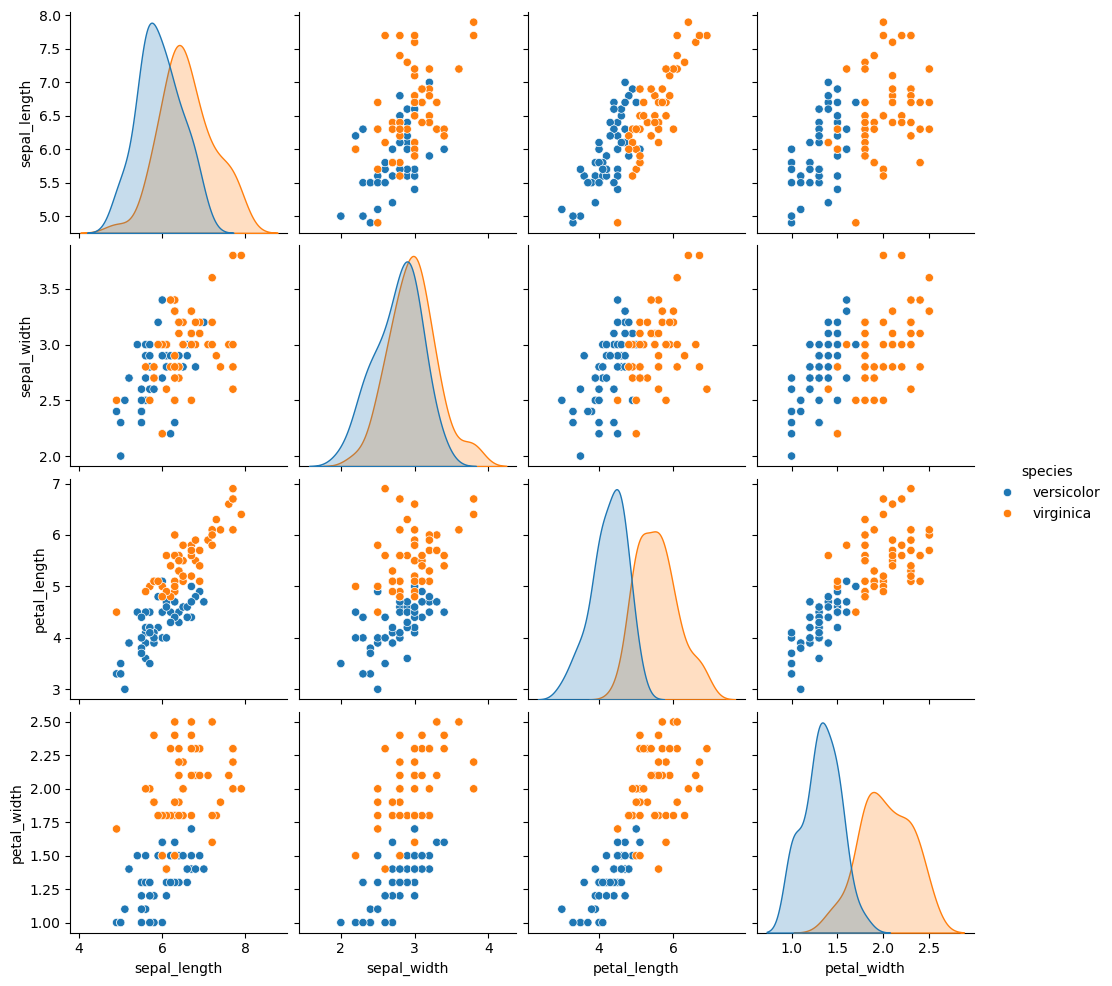

In [64]:
## EDA:
sns.pairplot(df,hue='species')

In [68]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.553855,0.828479,0.593709
sepal_width,0.553855,1.000000,0.519802,0.566203
petal_length,0.828479,0.519802,1.000000,0.823348
petal_width,0.593709,0.566203,0.823348,1.000000
